In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [18]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/amazon.csv')
print(data.head())


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [19]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [20]:
# Summary statistics of numerical features
data.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [21]:
# Data types of all columns
data.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [22]:
# Checking for missing values
data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

**Univariate Analysis**

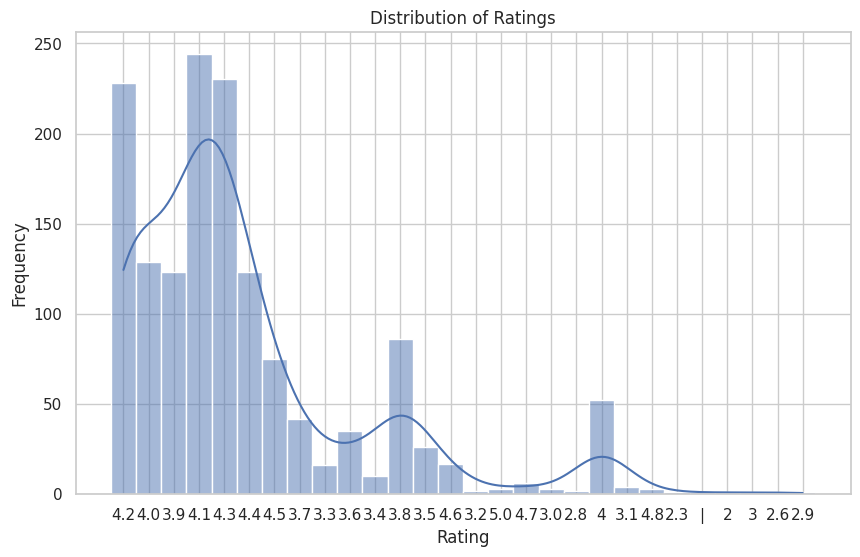

In [27]:
# Histogram for Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Enhanced Code for Visualizing Categorical Features**
1. Adjust Figure Size Based on Number of Categories
2. Rotate X-axis Labels for Better Readability
3. Display Counts on the Bars

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

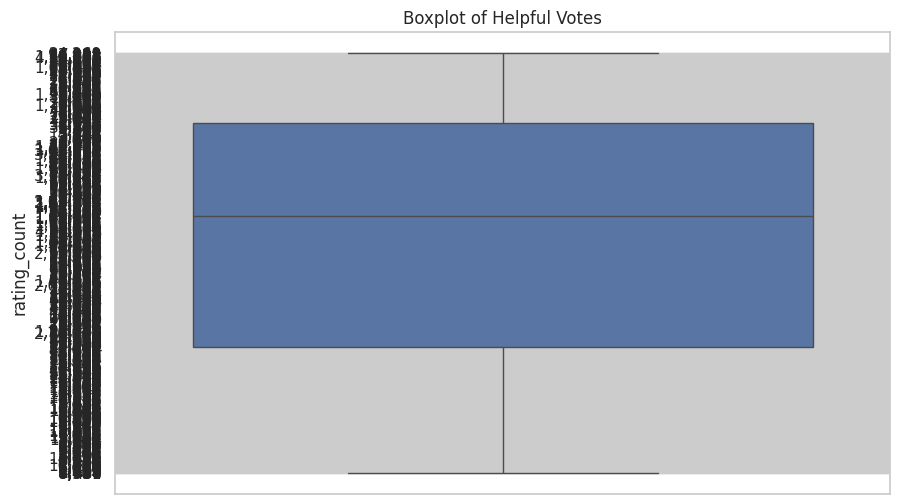

In [28]:
# Boxplot for Helpful Votes
plt.figure(figsize=(10, 6))
sns.boxplot(y='rating_count', data=data)
plt.title('Boxplot of Helpful Votes')
plt.show()

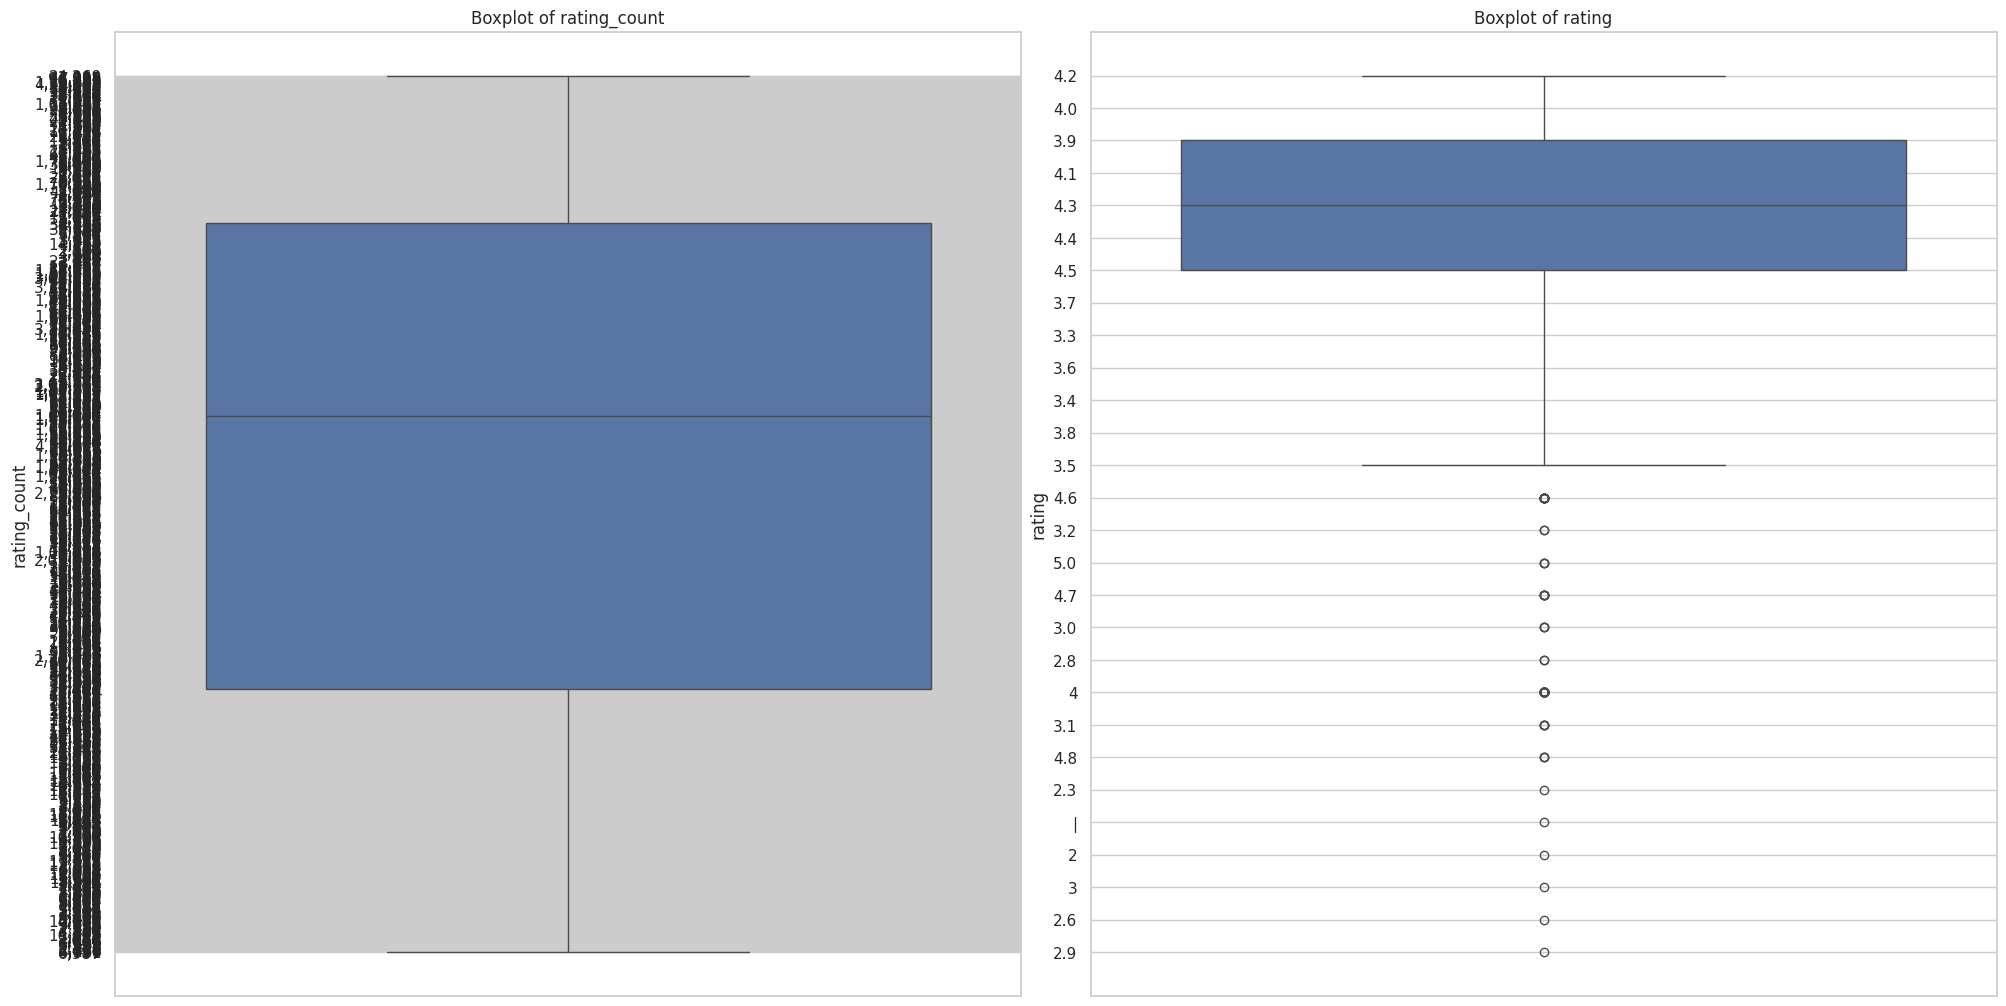

In [29]:
# Boxplot for Numeric Features
numeric_features = ['rating_count', 'rating']
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
for col in numeric_features:
    sns.boxplot(y=col, data=data, ax=axs[index])
    axs[index].set_title(f'Boxplot of {col}')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

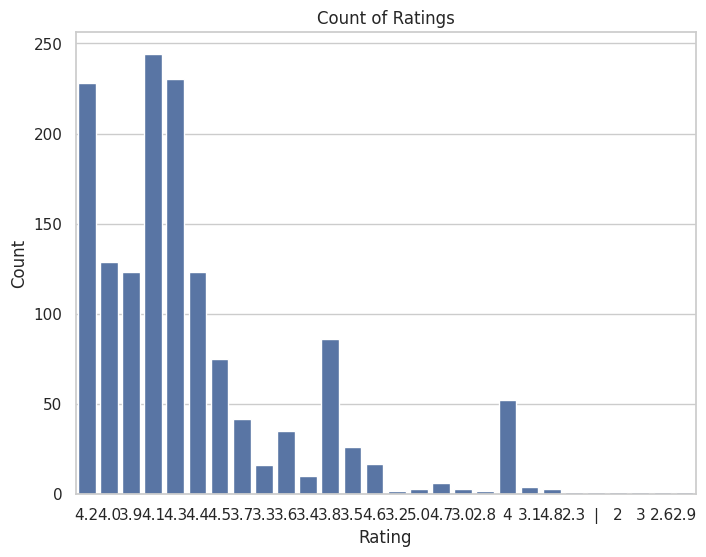

In [30]:
# Bar Plot for Rating Counts
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=data)
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Bivariate Analysis**

**Multivariate analysis**

**Pair Plot**: Provides a matrix of scatter plots for multiple numerical features, allowing visualization of pairwise relationships. Different colors can indicate different categories.

In [34]:
# Check if there are numerical features
if not numerical_features.empty:
    sns.pairplot(data[numerical_features])
    plt.suptitle('Pair Plot of Numerical Features', y=1.02)
    plt.show()
else:
    print("No numerical features found for pair plot.")

No numerical features found for pair plot.
